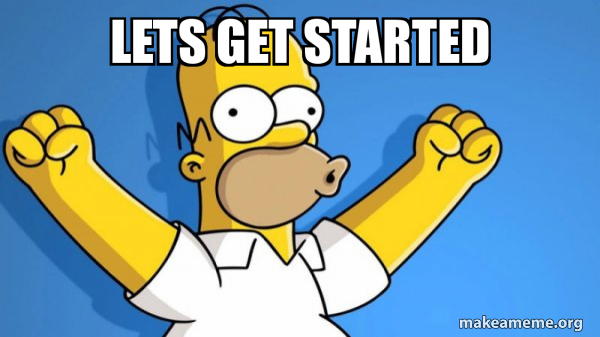

#Manipulating DataFrames with pandas

## chapter 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

### excrsice 1

In [2]:
# Print the head of the homelessness data
df=pd.read_csv(r'D:\CSV_Files\homelessness.csv')
df.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
0,0,East South Central,Alabama,2570.0,864.0,4887681
1,1,Pacific,Alaska,1434.0,582.0,735139
2,2,Mountain,Arizona,7259.0,2606.0,7158024
3,3,West South Central,Arkansas,2280.0,432.0,3009733
4,4,Pacific,California,109008.0,20964.0,39461588


In [3]:
# Import pandas using the alias pd 
      # all imports above
# Print the values of homelessness
values=df.values

# Print the column index of homelessness
columns=df.columns

# Print the row index of homelessness
index=df.index
index,values

(RangeIndex(start=0, stop=51, step=1),
 array([[0, 'East South Central', 'Alabama', 2570.0, 864.0, 4887681],
        [1, 'Pacific', 'Alaska', 1434.0, 582.0, 735139],
        [2, 'Mountain', 'Arizona', 7259.0, 2606.0, 7158024],
        [3, 'West South Central', 'Arkansas', 2280.0, 432.0, 3009733],
        [4, 'Pacific', 'California', 109008.0, 20964.0, 39461588],
        [5, 'Mountain', 'Colorado', 7607.0, 3250.0, 5691287],
        [6, 'New England', 'Connecticut', 2280.0, 1696.0, 3571520],
        [7, 'South Atlantic', 'Delaware', 708.0, 374.0, 965479],
        [8, 'South Atlantic', 'District of Columbia', 3770.0, 3134.0,
         701547],
        [9, 'South Atlantic', 'Florida', 21443.0, 9587.0, 21244317],
        [10, 'South Atlantic', 'Georgia', 6943.0, 2556.0, 10511131],
        [11, 'Pacific', 'Hawaii', 4131.0, 2399.0, 1420593],
        [12, 'Mountain', 'Idaho', 1297.0, 715.0, 1750536],
        [13, 'East North Central', 'Illinois', 6752.0, 3891.0, 12723071],
        [14, 'East No

### exercise 2

In [4]:
# Sort homelessness by individuals
homelessness_ind = df.sort_values('individuals',ascending=False)

# Print the top few rows
homelessness_ind.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
4,4,Pacific,California,109008.0,20964.0,39461588
32,32,Mid-Atlantic,New York,39827.0,52070.0,19530351
9,9,South Atlantic,Florida,21443.0,9587.0,21244317
43,43,West South Central,Texas,19199.0,6111.0,28628666
47,47,Pacific,Washington,16424.0,5880.0,7523869


In [5]:
# Select the individuals column
individuals = df['individuals']

# Print the head of the result
individuals[:5]

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64

In [6]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = df[df['individuals']>10000]

# See the result
ind_gt_10k.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
4,4,Pacific,California,109008.0,20964.0,39461588
9,9,South Atlantic,Florida,21443.0,9587.0,21244317
32,32,Mid-Atlantic,New York,39827.0,52070.0,19530351
37,37,Pacific,Oregon,11139.0,3337.0,4181886
43,43,West South Central,Texas,19199.0,6111.0,28628666


In [7]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = df[ (df['region']=='South Atlantic') | (df['region']=='Mid-Atlantic') ]

# See the result
south_mid_atlantic.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop
7,7,South Atlantic,Delaware,708.0,374.0,965479
8,8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,9,South Atlantic,Florida,21443.0,9587.0,21244317
10,10,South Atlantic,Georgia,6943.0,2556.0,10511131
20,20,South Atlantic,Maryland,4914.0,2230.0,6035802


### exercise 3

In [8]:
# Add total col as sum of individuals and family_members
df['Total']=df['individuals'] + df['family_members']
# Add p_individuals col as proportion of total that are individuals
df['p_individuals']=df['individuals']/df['Total']
# See the result
df.head()

,Unnamed: 0,region,state,individuals,family_members,state_pop,Total,p_individuals
0,0,East South Central,Alabama,2570.0,864.0,4887681,3434.0,0.748398
1,1,Pacific,Alaska,1434.0,582.0,735139,2016.0,0.711310
2,2,Mountain,Arizona,7259.0,2606.0,7158024,9865.0,0.735834
3,3,West South Central,Arkansas,2280.0,432.0,3009733,2712.0,0.840708
4,4,Pacific,California,109008.0,20964.0,39461588,129972.0,0.838704


In [9]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
df["indiv_per_10k"] = 10000 * df['individuals'] / df['state_pop']

# Subset rows for indiv_per_10k greater than 20
high_homelessness = df[df['indiv_per_10k']>20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = df.sort_values('indiv_per_10k',ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state','indiv_per_10k']]

# See the result
result.head()

,state,indiv_per_10k
8,District of Columbia,53.738381
11,Hawaii,29.079406
4,California,27.623825
37,Oregon,26.636307
28,Nevada,23.314189


## Chapter 2

### exercise 1

In [10]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv(r'D:\CSV_Files\sales_subset.csv')

# Print the head of the sales DataFrame
print(df.head())

# Print the info about the sales DataFrame
print(df.info())

# Print the mean of weekly_sales
print(f"Mean of weekly sales is {df['weekly_sales'].mean()}")

# Print the median of weekly_sales
print(f"Median of weekly sales is {df['weekly_sales'].median()}")


   Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0           0      1    A           1  2010-02-05      24924.50       False   
1           1      1    A           1  2010-03-05      21827.90       False   
2           2      1    A           1  2010-04-02      57258.43       False   
3           3      1    A           1  2010-05-07      17413.94       False   
4           4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------

In [11]:
# Print the maximum of the date column
print(f"Max of date is {df['date'].max()}")
# Print the minimum of the date column
print(f"The Min of date is {df['date'].min()}")

Max of date is 2012-10-26
The Min of date is 2010-02-05


- Use the custom iqr function defined for you along with .agg() to print the IQR of the temperature_c column of sales.
- Update the column selection to use the custom iqr function with .agg() to print the IQR of temperature_c, fuel_price_usd_per_l, and unemployment, in that order.
- Update the aggregation functions called by .agg(): include iqr and np.median in that order.



In [12]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Print IQR of the temperature_c column
print(df['temperature_c'].agg(iqr))

16.583333333333336


In [13]:
# Sort sales_1_1 by date
df = df.sort_values('date')

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
df['cum_weekly_sales'] = df['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
df['cum_max_sales']=df['weekly_sales'].cummax()

# See the columns you calculated
df.head()

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment,cum_weekly_sales,cum_max_sales
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106,24924.50,24924.50
6437,6437,19,A,13,2010-02-05,38597.52,False,-6.133333,0.780365,8.350,63522.02,38597.52
1249,1249,2,A,31,2010-02-05,3840.21,False,4.550000,0.679451,8.324,67362.23,38597.52
6449,6449,19,A,14,2010-02-05,17590.59,False,-6.133333,0.780365,8.350,84952.82,38597.52
6461,6461,19,A,16,2010-02-05,4929.87,False,-6.133333,0.780365,8.350,89882.69,38597.52


### exercise 2

In [14]:
# Drop duplicate store/type combinations
store_types = df.drop_duplicates(subset=['store','type'])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = df.drop_duplicates(subset=['store','department'])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = df[ df['is_holiday']==True ].drop_duplicates(subset=['date'])

# Print date col of holiday_dates
holiday_dates.head()

      Unnamed: 0  store type  department        date  weekly_sales  \
0              0      1    A           1  2010-02-05      24924.50   
6437        6437     19    A          13  2010-02-05      38597.52   
1249        1249      2    A          31  2010-02-05       3840.21   
6237        6237     14    A          95  2010-02-05     213042.66   
7993        7993     20    A          90  2010-02-05     114164.32   

      is_holiday  temperature_c  fuel_price_usd_per_l  unemployment  \
0          False       5.727778              0.679451         8.106   
6437       False      -6.133333              0.780365         8.350   
1249       False       4.550000              0.679451         8.324   
6237       False      -2.605556              0.735455         8.992   
7993       False      -3.377778              0.735455         8.187   

      cum_weekly_sales  cum_max_sales  
0             24924.50       24924.50  
6437          63522.02       38597.52  
1249          67362.23       385

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment,cum_weekly_sales,cum_max_sales
5198,5198,13,A,78,2010-02-12,12.00,True,0.644444,0.705604,8.316,2.283538e+07,293966.05
5606,5606,14,A,18,2010-09-10,1.94,True,21.594444,0.713001,8.743,1.754083e+08,293966.05
6810,6810,19,A,47,2010-12-31,-449.00,True,-1.861111,0.881278,8.067,2.377379e+08,293966.05
6820,6820,19,A,48,2011-09-09,197.00,True,20.155556,1.038197,7.806,2.568424e+08,293966.05
4295,4295,10,B,77,2011-11-25,1590.00,True,15.933333,0.993287,7.874,2.568458e+08,293966.05


In [15]:
# Count the number of stores of each type
store_counts = df.groupby(['type'])['store'].sum()
print(store_counts)

# Get the proportion of stores of each type
store_props = df.groupby(['type'])['store'].sum()/sum(df['store'])
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = df['department'].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = df['department'].value_counts(sort=True)/df['department'].sum()
print(dept_props_sorted)

type
A    157351
B      9020
Name: store, dtype: int64
type
A    0.945784
B    0.054216
Name: store, dtype: float64
department
1     144
67    144
46    144
49    144
58    144
     ... 
50     72
78     56
77     39
39      7
43      2
Name: count, Length: 80, dtype: int64
department
1     0.000296
67    0.000296
46    0.000296
49    0.000296
58    0.000296
        ...   
50    0.000148
78    0.000115
77    0.000080
39    0.000014
43    0.000004
Name: count, Length: 80, dtype: float64


### exercise 3

In [16]:
# Calc total weekly sales
sales_all = df["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = df.groupby(['type'])['weekly_sales'].sum()['A']

# Subset for type B stores, calc total weekly sales
sales_B = df.groupby(['type'])['weekly_sales'].sum()['B']

# Subset for type C stores, calc total weekly sales
#sales_C = df.groupby(['type'])['weekly_sales'].sum()['C'] #zero

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, 0] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


In [17]:
# Group by type; calc total weekly sales
sales_by_type = df.groupby(['type'])['weekly_sales'].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / np.sum(df['weekly_sales'])
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [18]:
# Import numpy with the alias np
    # Above :)
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = df.groupby(['type'])['weekly_sales'].agg([np.max,np.min,np.mean,np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = df.groupby(['type'])[['fuel_price_usd_per_l','unemployment']].agg([np.max,np.min,np.mean,np.median])
# Print unemp_fuel_stats
print(unemp_fuel_stats)

            max     min          mean    median
type                                           
A     293966.05 -1098.0  23674.667242  11943.92
B     232558.51  -798.0  25696.678370  13336.08
     fuel_price_usd_per_l                               unemployment         \
                      max       min      mean    median          max    min   
type                                                                          
A                1.107410  0.664129  0.744619  0.735455        8.992  3.879   
B                1.107674  0.760023  0.805858  0.803348        9.765  7.170   

                       
          mean median  
type                   
A     7.972611  8.067  
B     9.279323  9.199  


### exercise 4

In [19]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = df.pivot_table(index='type',values='weekly_sales',aggfunc=np.mean)

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [20]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(df.pivot_table(index='type',columns='department',values='weekly_sales',aggfunc=np.mean,fill_value=0))

department            1              2             3             4   \
type                                                                  
A           30961.725379   67600.158788  17160.002955  44285.399091   
B           44050.626667  112958.526667  30580.655000  51219.654167   

department            5             6             7             8   \
type                                                                 
A           34821.011364   7136.292652  38454.336818  48583.475303   
B           63236.875000  10717.297500  52909.653333  90733.753333   

department            9             10  ...            90            91  \
type                                    ...                               
A           30120.449924  30930.456364  ...  85776.905909  70423.165227   
B           66679.301667  48595.126667  ...  14780.210000  13199.602500   

department             92            93            94             95  \
type                                                         

## Chapter 3

### exercise 1

In [21]:
# Look at temperatures
df=pd.read_csv(r'D:\CSV_Files\temperatures.csv')
print(df)

# Set the index of temperatures to city
temperatures_ind = df.set_index('avg_temp_c')

# Look at temperatures_ind
print(temperatures_ind)

# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

       Unnamed: 0        date     city        country  avg_temp_c
0               0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1               1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2               2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3               3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4               4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...         ...      ...            ...         ...
16495       16495  2013-05-01     Xian          China      18.979
16496       16496  2013-06-01     Xian          China      23.522
16497       16497  2013-07-01     Xian          China      25.251
16498       16498  2013-08-01     Xian          China      24.528
16499       16499  2013-09-01     Xian          China         NaN

[16500 rows x 5 columns]
            Unnamed: 0        date     city        country
avg_temp_c                                                
27.293               0  2000-01-01  Abidjan  Côte D'Ivoire
27.68

In [22]:
# Make a list of cities to subset on
cities = ["Abidjan", "Xian"]

# Subset temperatures using square brackets
print(df[df['city'].isin(cities)])


       Unnamed: 0        date     city        country  avg_temp_c
0               0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1               1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2               2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3               3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4               4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...         ...      ...            ...         ...
16495       16495  2013-05-01     Xian          China      18.979
16496       16496  2013-06-01     Xian          China      23.522
16497       16497  2013-07-01     Xian          China      25.251
16498       16498  2013-08-01     Xian          China      24.528
16499       16499  2013-09-01     Xian          China         NaN

[330 rows x 5 columns]


In [23]:
# Index temperatures by country & city
temperatures_ind = df.set_index(['country', 'city'])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [('Brazil', 'Rio De Janeiro'), ('Pakistan', 'Lahore')]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level='city'))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=['country', 'city'], ascending=[True, False]))

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]
                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261 

### exersice 2

In [24]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt[ (temperatures_srt['country']=='Pakistan') | (temperatures_srt['country']=='Russia')])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt[ (temperatures_srt['city']=='Pakistan') | (temperatures_srt['city']=='Russia')])


KeyError: 'country'

In [25]:
# Subset columns from date to avg_temp_c
df.loc[:,'date':'avg_temp_c']


,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547
...,...,...,...,...
16495,2013-05-01,Xian,China,18.979
16496,2013-06-01,Xian,China,23.522
16497,2013-07-01,Xian,China,25.251
16498,2013-08-01,Xian,China,24.528


In [26]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = df[(df['date'] >= '2010-01-01') & (df['date'] <= '2011-12-31')]
print(temperatures_bool)

# Set date as the index and sort the index
temperatures_ind = df.set_index('date').sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc['2010':'2011'])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc['2010-08':'2011-02'])

       Unnamed: 0        date     city        country  avg_temp_c
120           120  2010-01-01  Abidjan  Côte D'Ivoire      28.270
121           121  2010-02-01  Abidjan  Côte D'Ivoire      29.262
122           122  2010-03-01  Abidjan  Côte D'Ivoire      29.596
123           123  2010-04-01  Abidjan  Côte D'Ivoire      29.068
124           124  2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...         ...      ...            ...         ...
16474       16474  2011-08-01     Xian          China      23.069
16475       16475  2011-09-01     Xian          China      16.775
16476       16476  2011-10-01     Xian          China      12.587
16477       16477  2011-11-01     Xian          China       7.543
16478       16478  2011-12-01     Xian          China      -0.490

[2400 rows x 5 columns]
            Unnamed: 0        city    country  avg_temp_c
date                                                     
2010-01-01        4905  Faisalabad   Pakistan      11.810
2010-01-0

In [27]:
# Get 23rd row, 2nd column (index 22, 1)
print(df.iloc[22,1])

# Use slicing to get the first 5 rows
print(df[:5])

# Use slicing to get columns 3 to 4
print(df[3:5])

# Use slicing in both directions at once
print(df.iloc[:5,3:5])

2001-11-01
   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
   Unnamed: 0        date     city        country  avg_temp_c
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
         country  avg_temp_c
0  Côte D'Ivoire      27.293
1  Côte D'Ivoire      27.685
2  Côte D'Ivoire      29.061
3  Côte D'Ivoire      28.162
4  Côte D'Ivoire      27.547


### exersice 3

In [28]:
# Add a year column to temperatures
df['year']=df['date'].apply(lambda x : x[:4])
# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = df.pivot_table(index='country',columns='city',values='avg_temp_c')

# See the result
print(temp_by_country_city_vs_year)

city                                  Abidjan  Addis Abeba  Ahmadabad  \
country                                                                 
Afghanistan                               NaN          NaN        NaN   
Angola                                    NaN          NaN        NaN   
Australia                                 NaN          NaN        NaN   
Bangladesh                                NaN          NaN        NaN   
Brazil                                    NaN          NaN        NaN   
Burma                                     NaN          NaN        NaN   
Canada                                    NaN          NaN        NaN   
Chile                                     NaN          NaN        NaN   
China                                     NaN          NaN        NaN   
Colombia                                  NaN          NaN        NaN   
Congo (Democratic Republic Of The)        NaN          NaN        NaN   
Côte D'Ivoire                       26.971024      

In [29]:
# Subset for Egypt to India
print(df[(df['country'] == 'Egypt') | (df['country'] == 'India')])

# Subset for Egypt, Cairo to India, Delhi
print(df[((df['country'] == 'Egypt') & (df['city'] == 'Cairo')) | ((df['country'] == 'India') & (df['city'] == 'Delhi'))])

# Subset for Egypt, Cairo to India, Delhi, and 2005 to 2010
print(df[((df['country'] == 'Egypt') & (df['city'] == 'Cairo')) | ((df['country'] == 'India') & (df['city'] == 'Delhi')) & (df['date'] >= '2005') & (df['date'] <= '2010')])


       Unnamed: 0        date       city country  avg_temp_c  year
330           330  2000-01-01  Ahmadabad   India      20.781  2000
331           331  2000-02-01  Ahmadabad   India      21.246  2000
332           332  2000-03-01  Ahmadabad   India      26.565  2000
333           333  2000-04-01  Ahmadabad   India      32.275  2000
334           334  2000-05-01  Ahmadabad   India      32.847  2000
...           ...         ...        ...     ...         ...   ...
14845       14845  2013-05-01      Surat   India      32.980  2013
14846       14846  2013-06-01      Surat   India      29.418  2013
14847       14847  2013-07-01      Surat   India      27.306  2013
14848       14848  2013-08-01      Surat   India      27.187  2013
14849       14849  2013-09-01      Surat   India         NaN  2013

[2805 rows x 6 columns]
      Unnamed: 0        date   city country  avg_temp_c  year
2310        2310  2000-01-01  Cairo   Egypt      12.669  2000
2311        2311  2000-02-01  Cairo   Egypt    

In [30]:
# Get the worldwide mean temp by year
mean_temp_by_year = df.groupby('year')['avg_temp_c'].mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = df.groupby('city')['avg_temp_c'].mean()

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])


year
2013    20.263006
Name: avg_temp_c, dtype: float64
city
Harbin    4.858494
Name: avg_temp_c, dtype: float64


## Chapter 4

### exersice 1

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


<BarContainer object of 3 artists>

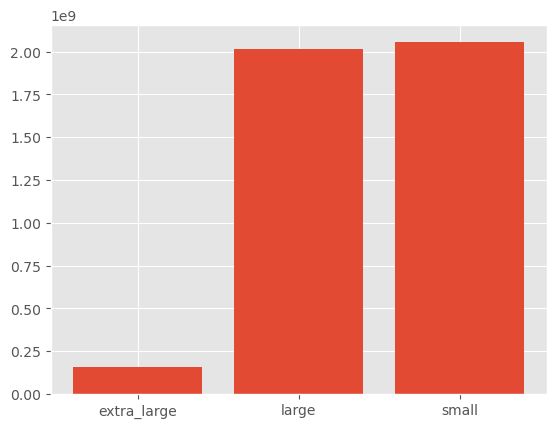

In [45]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
df=pd.read_pickle(r"D:\CSV_Files\avoplotto.pkl")
# Look at the first few rows of data
print(df.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = df.groupby('size')['nb_sold'].sum()

index=nb_sold_by_size.index
value = nb_sold_by_size.values
plt.bar(index,value)

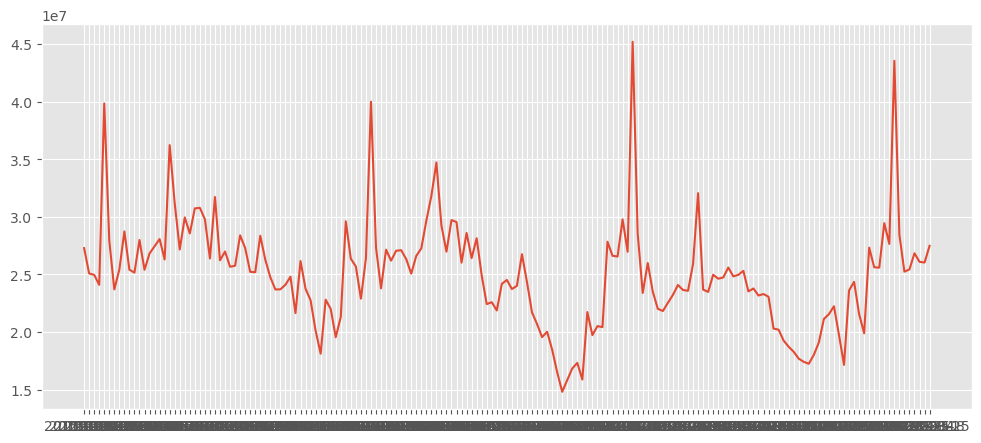

In [42]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = df.groupby('date')['nb_sold'].sum()
plt.figure(figsize=(12,5))
plt.plot(nb_sold_by_date.index,nb_sold_by_date.values)

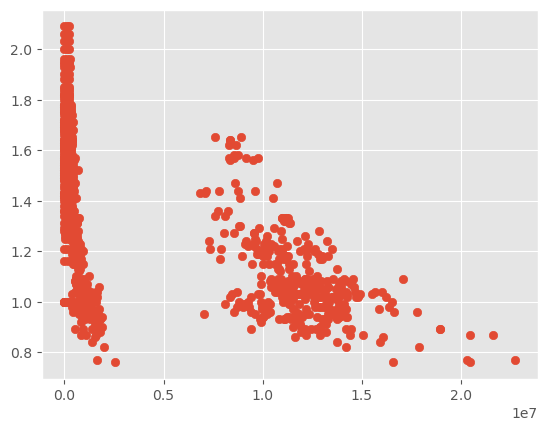

In [44]:
# Scatter plot of avg_price vs. nb_sold with title
plt.scatter(df['nb_sold'],df['avg_price'])



<Axes: xlabel='avg_price', ylabel='Count'>

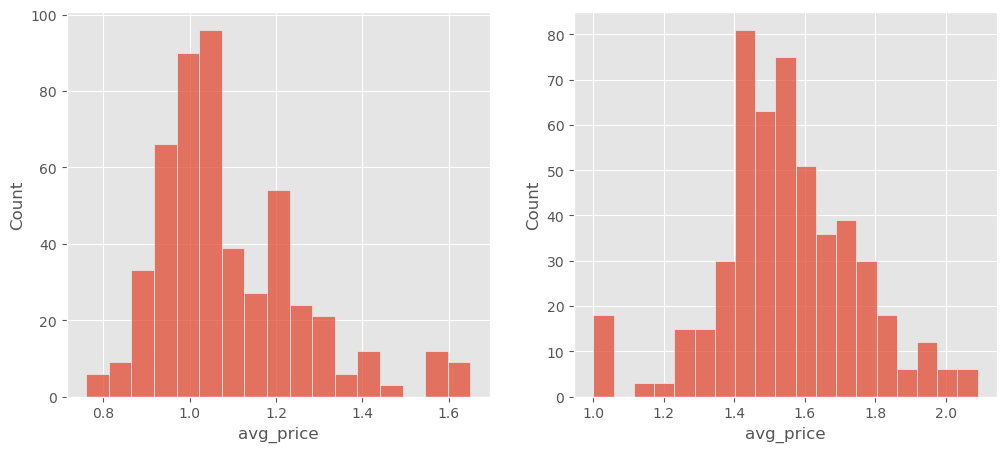

In [49]:
# Histogram of conventional avg_price
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df[df['type']=='conventional']['avg_price'])

# Histogram of organic avg_price
plt.subplot(1,2,2)
sns.histplot(df[df['type']=='organic']['avg_price'])


### exersice 2

0       0
1       0
2       0
3       0
4       0
       ..
1009    0
1010    0
1011    0
1012    0
1013    0
Length: 1014, dtype: int64
date         0
type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64


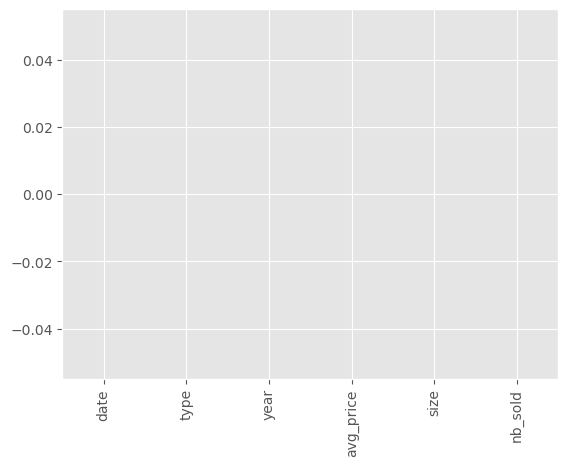

In [50]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(df.isnull().sum(axis=1))

# Check each column for missing values
print(df.isnull().sum())

# Bar plot of missing values by variable
df.isnull().sum().plot(kind='bar')

# Show plot
plt.show()

In [51]:
# Remove rows with missing values
avocados_complete = df.dropna()

# Check if any columns contain missing values
print(avocados_complete.isnull().sum())

date         0
type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64


In [52]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
df[cols_with_missing].isnull().sum().plot(kind='bar')
# HOOOOOOOOW?

KeyError: "None of [Index(['small_sold', 'large_sold', 'xl_sold'], dtype='object')] are in the [columns]"

In [53]:
df['date'].max()

'2018-03-25'

### exersice 3

In [55]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': '2019-01-01', 
     'type': 'conventional',
     'avg_price': 4.5},
    {'date': '2019-01-01',
     'type': 'organic', 
     'avg_price': 9.5},
]
# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
avocados_2019

,date,type,avg_price
0,2019-01-01,conventional,4.5
1,2019-01-01,organic,9.5


### exersice 4

In [ ]:
# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_csv(r'airline_bumping')

# Take a look at the DataFrame
print(airline_bumping.head())

In [ ]:
# Create airline_totals_sorted
airline_totals_sorted = airline_bumping.sort_values('total_bumps',ascending=False)

# Print airline_totals_sorted
airline_totals_sorted.head()

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv('airline_totals_sorted.csv')

In [ ]:
import art
